> 2019-3-19 12:33:47
> integrate data_analysis_python.ipynb with CRISP-DM framework.

# import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Reference

- Scipy: https://docs.scipy.org/doc/scipy/reference/genindex.html
- Numpy: https://docs.scipy.org/doc/numpy/genindex.html
- Pandas: http://pandas.pydata.org/pandas-docs/stable/genindex.html
- Matplotlib: https://matplotlib.org/genindex.html
- tslern: https://tslearn.readthedocs.io/en/latest/auto_examples/index.html
- StatsModel: http://www.statsmodels.org/stable/index.html
- 

- CA683_DataAnalytics_DataMining
- CA659_MathmeticalMethod
- https://otexts.com/fpp2/
- Textbook: Python for Data Analysis
- https://anomaly.io/moving-median-robust-anomaly/
- YouDaoNoet: 
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://pbpython.com/

# Problem recognition/Business Understanding

## Determine Business Objectives

## Assess Situation

## Determine Data Mining Goals

# Data Understanding

## Collect Raw Data

- long format for multiple time series

### tslearn.datasets

```
from tslearn.datasets import UCR_UEA_datasets

datasets = datasets = UCR_UEA_datasets()

dataset_list = datasets.list_datasets()

output = 'ucr_uea_datasets_list.txt'
with open(join(PROJECT_PATH,output),'w+') as f:
  f.write(str(dataset_list))

> see content/drive/My Drive/DCU/practicum/ucr_uea_datasets_list.txt

ecg200 = datasets.load_dataset('ECG200')

# Directly unpack a tuple, return 4 numpy.ndarray
X_train, y_train, X_test, y_test = ecg200

X_train.shape
> (100, 96, 1)
```

## Describe Data
- index or columns are all the pandas datatype.
    - df.index
    - df.columns
- append Concatenate with additional Index objects, producing a new Index
- difference Compute set difference as an Index
- intersection Compute set intersection
- union Compute set union
- isin Compute boolean array indicating whether each value is contained in the passed collection
- delete Compute new Index with element at index i deleted
- drop Compute new Index by deleting passed values
- insert Compute new Index by inserting element at index i
- is_monotonic Returns True if each element is greater than or equal to the previous element
- is_unique Returns True if the Index has no duplicate values
- unique Compute the array of unique values in the Index
- value_counts()
- isin Compute boolean array indicating whether each Series value is contained in the passed sequence ofvalues
- match Compute integer indices for each value in an array into another array of distinct values; helpful for data alignment and join-type operations
- unique Compute array of unique values in a Series, returned in the order observed
- value_counts Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order


> py for da, page 160, table 5-8
- count Number of non-NA values
- describe Compute set of summary statistics for Series or each DataFrame column
- min, max Compute minimum and maximum values
- argmin, argmax Compute index locations (integers) at which minimum or maximum value obtained, respectively
- idxmin, idxmax Compute index labels at which minimum or maximum value obtained, respectively
- quantile Compute sample quantile ranging from 0 to 1
- sum Sum of values
- mean Mean of values
- median Arithmetic median (50% quantile) of values
- mad Mean absolute deviation from mean value
- prod Product of all values

- var Sample variance of values
\begin{equation*}
\sigma^2 (x) = E[(X-E(X))^2] =  E[(x-\mu)^2]
\end{equation*}

- std Sample standard deviation of values
\begin{equation*}
\sigma(x) = \sqrt{E[(X-E(X))^2] =  E[(x-\mu)^2]}
\end{equation*}

- skew Sample skewness (third moment) of values
    - skewness is a measure of the asymmetry of the probability distribution
    - negative skew commonly indicates that the tail is on the left side of the distribution,
    - positive skew indicates that the tail is on the right
\begin{equation*}
skew(X) = E[(\frac{x-\mu}{\sigma})^3]
\end{equation*}    

- kurt Sample kurtosis (fourth moment) of values
    -  person:  the fourth moment 
        - related to the tails of the distribution
        - the sometimes-seen characterization as "peakedness" is mistaken
\begin{equation*}
kurt(X) =  E[(\frac{x-\mu}{\sigma})^4]
\end{equation*}
- cumsum Cumulative sum of values
- cummin, cummax Cumulative minimum or maximum of values, respectively
- cumprod Cumulative product of values
- diff Compute first arithmetic difference (useful for time series)
    - https://machinelearningmastery.com/difference-time-series-dataset-python/
- pct_change Compute percent changes
- cov Covariance(协方差): how one variable varies with a second
    - df.cov Covariance Matrix
        - Compute pairwise covariance of columns, excluding NA/null values.
        - return covariance matrix 
    - if cov is 0: then X and Y is indepedent
\begin{equation*}
COV(x,y) = E[(x-\mu_x)(y-\mu_y)]
\end{equation*}

- Correlation(相关系数): scales the covariance
    - Correlation is a kind of normalized covariance, with a value between -1 and 1
\begin{equation*}
\rho(x,y) = COV(x,y) / \sigma(x)\sigma(y)
\end{equation*}


### Database Method UML
- UML
    - https://openclassrooms.com/en/courses/4191736-design-a-database-with-uml/4191743-learn-about-class-diagrams
    - draw.io

### Main Components of a Time Series
- Trend:  The general direction in which the series is running during a long period
- Seasonality: A seasonal pattern occurs when a time series is accted by seasonal factors such as the time of the year or the day of the week.
- Cyclic: A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.
    - The duration of these fluctuations is usually at least 2 years.


####  Autocorrelation
- signal correlation with itself at various t
    - [ ]the relationship with DFT
- There are several autocorrelation coefficients,
- pa

#### Stationarity
- A time series is first order stationary iff It is stationary in the mean (i.e. has constant mean).
- A time series is second order stationary iff It is stationary in the mean & variance (constant mean, variance, covariance).
- time series with trends/ seasonality, are not stationary
- white noise series is stationary

### Visualize

#### Matplotlib
- s1. Get fig and axes object and initial them

```
# use Grid Axes to arrange the figure.
widths = [4]
heights = [1,1,1,1,1] 

gs_kw = dict(width_ratios=widths,height_ratios=heights)
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=[18,20],
                        constrained_layout=True,gridspec_kw = gs_kw)

fig.suptitle(main_title,y=1.0,fontsize=50)

```

- s2. def the plot function
    - https://matplotlib.org/api/axes_api.html#the-axes-class 
```
def data_plot(ax,data):
    - ax.plot
    
```
- s3. show plot:

```
plt.show
```

#### pandas.plot()

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
- for quick plot pd.Series or pd.DataFrame


## Explore 

> can use QA format

- pct_change()
- corr()
- cov()
- corrwith()

### Groupby
- http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

#### Searching
- groupby.groups
    - return the entry index, not the groubyed column values, id rather than values.

### time-series 
#### Seasonal plots:
- data against seasonality,
- many lines in one graph
- variation: polar coordinates
- variation: 

#### Scatter plot

- x,y axis represent the two kinds features and scatter shape represent the category.

#### Scatter plot matrix

#### Lag plots 
- panel 1 is the realationship between y_t and y_{t-1}

#### ACF plot 
- correlogram
- trend:
    - the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size.
- seasonal: 

## Verify Data Quality

# Data Preparation

## Select Data
- http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- loc: Selection By Label
    - A single label, e.g. 5 or 'a', 
    - A list or array of labels, e.g. ['a', 'b', 'c'].
    - A slice object with labels, e.g. 'a':'f'.
        - both the start and the stop are included
    - A boolean array of the same length as the axis being sliced, e.g. [True, False, True].
    - A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)
 
- df[val] Select single column or sequence of columns from the DataFrame; special case conveniences: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criterion)
- df.loc[val] Selects single row or subset of rows from the DataFrame by label
- df.loc[:, val] Selects single column or subset of columns by label
- df.loc[val1, val2] Select both rows and columns by label
- df.iloc[where] Selects single row or subset of rows from the DataFrame by integer position
- df.iloc[:, where] Selects single column or subset of columns by integer position
- df.iloc[start:stop:step,:] Select all column and certain rows.
- df.iloc[where_i, where_j] Select both rows and columns by integer position
- df.at[label_i, label_j] Select a single scalar value by row and column label
- df.iat[i, j] Select a single scalar value by row and column position (integers)
- reindex method Select either rows or columns by labels
- get_value, set_value methods Select single value by row and column label

## Clean Data
- reset_index(drop=True) :  resets the index to the default integer index.
    

### string and text

- python built-in
    - count Return the number of non-overlapping occurrences of substring in the string.
    - endswith Returns True if string ends with suffix.
    - startswith Returns True if string starts with prefix.
    - join Use string as delimiter for concatenating a sequence of other strings.
    - index Return position of first character in substring if found in the string; raises ValueError if not found.
    - find Return position of first character of first occurrence of substring in the string; like index, but returns –1
    - if not found.
    - rfind Return position of first character of last occurrence of substring in the string; returns –1 if not found.
    - replace Replace occurrences of string with another string.
    - strip,
    - rstrip,
    - lstrip
    - Trim whitespace, including newlines; equivalent to x.strip() (and rstrip, lstrip, respectively)
    - for each element.
    - split Break string into list of substrings using passed delimiter.
    - lower Convert alphabet characters to lowercase.
    - upper Convert alphabet characters to uppercase.
    - casefold Convert characters to lowercase, and convert any region-specific variable character combinations to a
     common comparable form.
    - ljust,
    - rjust
    - Left justify or right justify, respectively; pad opposite side of string with spaces (or some other fill
    - character) to return a string with a minimum width.

- re module:
    - findall Return all non-overlapping matching patterns in a string as a list
    - finditer Like findall, but returns an iterator
    - match Match pattern at start of string and optionally segment pattern components into groups; if the pattern matches, returns a match object, and otherwise None
    - search Scan string for match to pattern; returning a match object if so; unlike match, the match can be anywhere in the string as opposed to only at the beginning
    - split Break string into pieces at each occurrence of pattern
    - sub, subn Replace all (sub) or first n occurrences (subn) of pattern in string with replacement expression; use symbols \1, \2, ... to refer to match group elements in the replacement string

### Missing value
- dropna Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate.
- fillna Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.
- isnull Return boolean values indicating which values are missing/NA.
- notnull Negation of isnull.

In [3]:
df = pd.DataFrame(np.random.randn(5,5),columns=['a', 'b', 'c', 'd', 'e'])

In [4]:
df[df > 0.9] = np.nan

In [5]:
df.isnull()

,a,b,c,d,e
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,True,False,False
4,False,True,False,False,False


In [6]:
df.isnull().sum()

a    1
b    1
c    1
d    0
e    1
dtype: int64

In [7]:
df.isnull().values.any()

True

### Outliers

- [ ] https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html

## Construct Data
- pd.reindex()
    - index New sequence to use as index. Can be Index instance or any other sequence-like Python data structure. An
    - Index will be used exactly as is without any copying.
    - method Interpolation (fill) method; 'ffill' fills forward, while 'bfill' fills backward.
    - fill_value Substitute value to use when introducing missing data by reindexing.
    - limit When forward- or backfilling, maximum size gap (in number of elements) to fill.
    - tolerance When forward- or backfilling, maximum size gap (in absolute numeric distance) to fill for inexact matches.
    - level Match simple Index on level of MultiIndex; otherwise select subset of.
    - copy If True, always copy underlying data even if new index is equivalent to old index; if False, do not copy the data when the indexes are equivalent.

- pd.drop()
    - drop values from the columns by passing axis=1 or axis='columns':
- arithmetic between objects with different indexes.
    - By default, arithmetic between DataFrame and Series matches the index of the Series on the DataFrame’s columns, broadcasting down the rows
    - the union of the index pairs.
    - similar to an automatic outer join on the index labels
    - add: NaN if not in both df.
    - add, radd Methods for addition (+)
    - sub, rsub Methods for subtraction (-)
    - div, rdiv Methods for division (/)
    - floordiv, rfloordiv Methods for floor division (//)
    - mul, rmul Methods for multiplication (*)
    - pow, rpow Methods for exponentiation (**)
- NumPy ufuncs
    - npl.abs(df)
    - https://docs.scipy.org/doc/numpy/reference/ufuncs.html
- df.apply(f, axis='columns')
    - take row as series
- sort_index()
- sort_values()
- rank()
    - 'average' Default: assign the average rank to each entry in the equal group
    - 'min' Use the minimum rank for the whole group
    - 'max' Use the maximum rank for the whole group
    - 'first' Assign ranks in the order the values appear in the data
    - 'dense' Like method='min', but ranks always increase by 1 in between groups rather than the number of equal
    - elements in a group

In [3]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.105115,-1.716227,-0.925245
Ohio,-0.914894,-0.789922,0.402857
Texas,-0.183623,0.161255,1.060435
Oregon,0.430404,0.509110,1.009081


In [4]:
np.abs(frame)

,b,d,e
Utah,1.105115,1.716227,0.925245
Ohio,0.914894,0.789922,0.402857
Texas,0.183623,0.161255,1.060435
Oregon,0.430404,0.509110,1.009081


In [5]:
frame

,b,d,e
Utah,-1.105115,-1.716227,-0.925245
Ohio,-0.914894,-0.789922,0.402857
Texas,-0.183623,0.161255,1.060435
Oregon,0.430404,0.509110,1.009081


In [6]:
1.246435 + 0.555730

1.802165

## Integrate Data
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### pd.merge(left,right,how=,on=)
- left DataFrame to be merged on the left side.
- right DataFrame to be merged on the right side.
- how One of 'inner', 'outer', 'left', or 'right'; defaults to 'inner'.
- on Column names to join on. Must be found in both DataFrame objects. If not specified and no other join keys 
    given, will use the intersection of the column names in left and right as the join keys.
- left_on Columns in left DataFrame to use as join keys.
- right_on Analogous to left_on for left DataFrame.
- left_index Use row index in left as its join key (or keys, if a MultiIndex).
- right_index Analogous to left_index.
- sort Sort merged data lexicographically by join keys; True by default (disable to get better performance in
    some cases on large datasets).
- suffixes Tuple of string values to append to column names in case of overlap; defaults to ('_x', '_y') (e.g., if  'data' in both DataFrame objects, would appear as 'data_x' and 'data_y' in result).
- copy If False, avoid copying data into resulting data structure in some exceptional cases; by default always copies.
- indicator Adds a special column _merge that indicates the source of each row; values will be 'left_only',
     'right_only', or 'both' based on the origin of the joined data in each row.

In [ ]:
! 

## Format Data
- https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data

### tslearn.preprocessing
- tslearn.preprocessing.TimeSeriesScalerMinMax(min=0.0, max=1.0)
    - Scaler for time series. Scales time series so that their span in each dimension is between min and max.

### sklearn.preprocessing
- sklearn.preprocessing.LabelBinarizer()

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2])
arr = lb.transform([1, 2])
arr.ndim

2

### Log-scale

# Modeling
- Tips:
    - when learning a new model, start from the fit function.

- generative model:
    - generative classifiers (joint distribution)
- discriminative model (conditional distribution or no distribution)
- several views of a model:
    - for what kind problems:
    - main steps
    - effiency
    - accuracy
    - interpretability

## Select Modeling Technique

### Additive model(AM)
- nonparametric regression
- Suits if the size of seasonal fluctuations (or variation around the trend Tt) doesn’t vary with the time series level
- Means the seasonality is the same (roughly constant) in same period over different years (does not depend on level)
-  more interpretable than a general regression surface at the cost of approximation errors. 

### Multiplicative Model
- Suits if the variation in seasonal pattern or that around the trend (Tt) does vary with the time series level.
- Sometimes seasonal effect is a proportion of underlying trend value, e.g. in previous slide, they increase with trend

### Naive
- all forecasts for the future are equal to the last observed value of the series
\begin{equation*}
y_t = y_{t-1}
\end{equation*}

### Prophet
- https://facebook.github.io/prophet/
- https://research.fb.com/prophet-forecasting-at-scale/
- https://pbpython.com/prophet-overview.html
- https://colab.research.google.com/drive/1dL_XNqTg6KGjuGhSNZkajvFZQMNjcc9H?authuser=1#scrollTo=9E1nB_64XVrB
- can not install on windows10, has a known problem.
    - we can use colab.

- Title: Forecasting at Scale
- Review Date: 2019-3-19 12:42:302
- Published year: 27 Sep 2017
- Auther: Facebook
- Unicode:
- Useful Reference:
- Usefulness:
- Expression:
    - pronounced dip around Christmas and New Year.
    - is no exception
    - intuitive parameters
    - inherently different from
- Key Words:
    - three type scale:
        - people
        - variety of forecasting problems
        - forecasting model evaluation
- Purpose Problem: 
    - two main forecast themes:
        - Completely automatic forecasting techniques can be brittle and they are often too inflexible to incorporate useful assumptions or heuristics.
        - Analysts who can produce high quality forecasts are quite rare because forecasting is a specialized data science skill requiring substantial experience.
    - a practical approach to forecasting \at scale" that combines configurable models with analyst-in-the-loop performance analysis
    - high quality forecasts often far outstrips the pace at which they can be produced.
    - Prophet’s features, 
        - like multiple seasonality
        - changing growth rates
        - the ability to model special days (such as Manning’s playoff and superbowl appearances)
- Algorithm:
    - why prophet? 6 point       
        - hourly, daily, or weekly observations with at least a few months (preferably a year) of history
        - more modeling flexibility,
    - HOW prophtet work?
        - A piecewise linear or logistic growth curve trend.
        - A yearly seasonal component modeled using Fourier series.
        - A weekly seasonal component using dummy variables.
        - A user-provided list of important holidays.
        - hundred HMC iterations
        - We fit the Prophet model using Stan,
            - Stan® is a state-of-the-art platform for statistical modeling and high-performance statistical computation.

- Features of Business Time Series
    - seasonality: weekly, yearly
    - trend
    - outliers
    - problem of automated methods:
        - auto.arima: large trend errors
        - exponential smoothing : missing long-term seasonality
        - overreact to the end of year dip.
        - Tuning these methods requires a thorough understanding of how the underlying time series models work.
- The prophet forecasting model
    - handle the common features above
    - intuitive parameters 
    - a decomposable model
\begin{equation*}
y(t) = g(t) + s(t) + h(t) + \xi_t
\end{equation*}
        - g(t): trend function
        - s(t): periodic changes，weekly and yearly seasonality
        - h(t): effects of holidays
        - \xi_t: idiosyncratic changes
        - [ ]similar to GAM
            - decomposes easily and accommodates new components as necessary
     - Several practical advantages:
         - flexibility
         - not need to be regularly spaced, not need to interpolate missing values

#### The Trend Model:
- Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change.
- Logistic growth model/nonlinear, saturating growth

\begin{equation*}
g(t) = \frac{C}{1+exp(-k(t-m))} 
\end{equation*}

    - C: carring capacity
    - k: growth rate
    - m : an offset parameter? How to understand this

- piecewise logistic growth model
    - for trend changes
- piecewise constant rate growth model for forecasting.
\begin{equation*}
g(t) = (k + a(t)^T\delta)t + (m + a(t)^T\gamma) 
\end{equation*}  
- automatic changepoint selection
    - MLE
    - [ ]a sparse prior

#### Seasonality
- standard Fourier series
\begin{equation*}
s(t) = \sum (a_n\cos(\frac{2\pi nt}{P}) + b_n\sin(\frac{2\pi nt}{P}))
\end{equation*}

#### Holidays and Events
- allow the analyst to provide a custom list of past and future events, identified by the event or holiday's unique name

#### Model Fitting
- regularization
    - https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2
delta  double_exponential(0, tau);
beta  normal(0, sigma);

#### Automating Evaluation of Forecasts

- Modeling Forecast Accuracy
    - MAPE for interpretability : Mean absolute percentage error
    

***
- Experiment:
- Conclusion:
- Limitation:
- Summary:

#### impletation

> https://facebook.github.io/prophet/docs/quick_start.html#python-api
- The input to Prophet is always a dataframe with two columns: ds and y
    - ds: datestamp,  format expected by Pandas
    - y: The y column must be numeric, and represents the measurement we wish to forecast.
- Automatic changepoint detection in Prophet
    - 1. specifying a large number of potential changepoints at which the rate is allowed to change
    - 2. puts a sparse prior on the magnitudes of the rate changes : same as L1 regularization
        - L1 regularization: https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2
        - Loss function is the sum of squared difference between the actual value and the predicted value
        - by penalizing the loss function, regularization discourage the complexity of the model
        - Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.
        - L1 regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.
    - 3. will use as few of them as possible
    - by increasing changepoint_prior_scale, will increase the forecast uncertainty



- Holidays
    - 1. create a dataframe for holidays

- Seasonalities 
    - are estimated using a partial Fourier sum
    - Prophet will by default fit weekly and yearly seasonalities
    - You can add other seasonalities (monthly, quarterly, hourly) using the add_seasonality method (Python)
    - seasonality_prior_scale which similarly adjusts the extent to which the seasonality model will fit the data.
    - By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. 
    - grows with the trend. This is multiplicative seasonality.

- Uncertainty Intervals
    - There are three sources of uncertainty in the forecast: uncertainty in the trend, uncertainty in the seasonality estimates, and additional observation noise.
    - The biggest source of uncertainty in the forecast is the potential for future trend changes.
    - by increasing changepoint_prior_scale, will increase the forecast uncertainty
    - To get uncertainty in seasonality, you must do full Bayesian sampling. This is done using the parameter mcmc.samples (which defaults to 0)

- outliers
    -  Prophet is able to handle the outliers in the history, but only by fitting them with trend changes.
    - The best way to handle outliers is to remove them



- Data with regular gaps
    -  fit a daily cycle to a time series that only has data for part of the day (12a to 6a)
    - The solution is to only make predictions for the time windows for which there are historical data.

- Diagnostics : This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point.



***
> key steps:
##### step1:  import Package

```
from fbprophet import Prophet
```


##### step2:  a new Prophet object : Any settings to the forecasting procedure are passed into the constructor

```
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))



m = Prophet(changepoint_range=0.9,
        changepoint_prior_scale=0.5,
        changepoints=['2014-01-01'],
        holidays = holidays,
        yearly.seasonality = 20,
        weekly_seasonality=False,
        seasonality_mode='multiplicative')
```
- trend adjust
    - n_changepoints
        - number of potential changepoints
        - By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series
    - changepoint_range=0.9
        - By default changepoints are only inferred for the first 80% 
    - changepoint_prior_scale=0.5:
        - Adjusting trend flexibility, overfit (too much flexibility) or underfit (not enough flexibility)
        - By default, this parameter is set to 0.05.  Increasing it will make the trend more flexible
    - changepoints=['2014-01-01']
        - changepoints manually

- seasonality adjust:
    

- yearly.seasonality = 20
    - Fourier order can be specified for each built-in seasonality
- seasonality_mode:

```

# add Built-in Country Holidays
m.add_country_holidays(country_name='US')
```



```
# add add other seasonalities (monthly, quarterly, hourly) 
# besides the default weekly and yearly seasonalities
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

```
- prior_scale=0.1: 
    - Prior scales can be set separately for individual holidays by including a column prior_scale in the holidays dataframe




- holidays = holidays
    - two columns (holiday and ds) and a row for each occurrence of the holiday. 
    - The holiday effect can be seen in the forecast dataframe(see s4) 
    - The holiday effects will also show up in the components plot(see s5)


```
# add extra regressor
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)




m = Prophet()
m.add_regressor('nfl_sunday')
```
- Additional regressors can be added to the linear part of the model using the add_regressor method or function
- regressors must be added prior to model fitting.

```
m
```

##### step3: make a datafrmae include the future date you want to forecasting.
```
#Prophet.make_future_dataframe
future = m.make_future_dataframe(periods=365)

# only predict monthly data
#future = m.make_future_dataframe(periods=120, freq='M')

future.tail()
```
##### step4: Predict: The predict method will assign each row in future a predicted value which it names yhat.
    - The predict method will assign each row in future a predicted value which it names yhat.
```

forecast = m.fit(df).predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# holiday effect
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]
```

##### step5: Plot: plot the forecast by calling the Prophet.plot
    - plot change points
```

# show holiday effect
# show seasonality effect
fig2 = m.plot_components(forecast)



# show changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# plot_cross_validation_metric,
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
```


##### step6: diagnostics

```
# cross_validation
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

```
- initial: the size of the initial training period
    - if the cutoff is less than initial, stop calculate the cutoff.
    - default, the initial training period is set to three times the horizon
- horizon: forecast horizon 
    -- As a heuristic, for a forecast horizon H, we generally make a simulated forecast every H/2 periods.
- period: spacing between cutoff dates 
    - start from every cutoff date point 
    - default: cutoffs are made every half a horizon.
- steps:
    - s1. get the cut off point from the end of the time-series date       
    - s2. train the model use the data from start to the first cutoff
    - s3. predict the cutoff + horizon data
    - s4. move to the next cutoff, repead s2,s3 until the last cutoff
    - s5. output a sets of prediction value, ea





```
# performance_metrics 
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
```

```
# plot the performace metrics
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
```
-  The default is 0.1, corresponding to 10% of rows from df_cv

In [4]:
# holiday example
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  #'lower_window': 0,
  #'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



### Autoregression(AR)
> https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- the only model can use KFold cross validation

\begin{equation*}
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + e_t 
\end{equation*}

- et: whiti noise(WN)
- is a multiple regression
- y_t is the lagged value as predictions
- if p= 1 : AR(1) model

\begin{equation*}
y_t = c + \phi_1 y_{t-1} + e_t 
\end{equation*}

- if \phi_1 =0: == WN
- if \phi_1 = 1 and c=0,y_t = RW(Random Walk)
\begin{equation*}
y_t = y_{t-1} + e_t 
\end{equation*}
- 0 
    - RW model is where current value is previous plus random step up or down
    - RW has zero mean but time-varying variance, thus is non-stationary.



In [19]:
from statsmodels.tsa.ar_model import AR
from random import random

# contrived dataset
data = [x + random() for x in range(1,100)]

# fit model
model = AR(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data),len(data))
print(yhat)

[100.68532718]


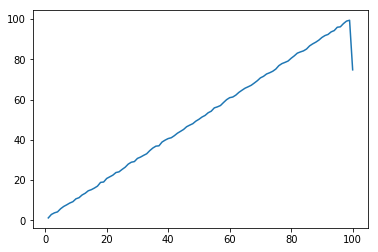

In [7]:
# plot
data_all = data + [yhat]
index = range(1,len(data_all)+1)

plt.plot(index,data_all)
plt.show()

- [ ] fit and predict is very complex functions.
- [ ] likelyhood

### Moving Average(MA)
\begin{equation*}
y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \theta_q e_{t-q}
\end{equation*}
- et: white noise
- is a multiple regression with past errors as predictors
- uses past forecast errors in a regression-like model
- Don’t confuse this with moving average smoothing
- The method is suitable for univariate time series without trend and seasonal components.
- the average method assumes that all observations are of equal importance, and gives them equal weights when generating forecasts.
    - [ ] How to decompose the trend and seasonal components?
\begin{equation*}
\hat{y_t} = \frac{1}{m} \sum y_{t+j}
\\
m = 2k+1,j= [-k,k]
\end{equation*}
- It is possible to write any stationary AR( ) model as an MA( ) model


In [2]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# contrived dataset
data = [x+ random() for x in range(1,100)]

# fit model
model = ARMA(data,order=(0,1))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(data),len(data))
print(yhat)

[74.71912804]


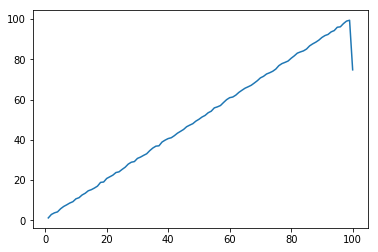

In [8]:
# plot
data_all = data + [yhat]
index = range(1,len(data_all)+1)

plt.plot(index,data_all)

###  ARMA
- with both MA&AR terms, no differencing
\begin{equation*}
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \theta_q e_{t-q}
\end{equation*}
- Conditions on coefficients ensure stationarity.
- Conditions on coefficients ensure invertibility.

In [9]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.57169792]


###  ARIMA (Autoregressive Integrated Moving Average)

- auto.arima in R: automatically selects the best one

\begin{equation*}
y'_t = c + \phi_1 y'_{t-1} + \phi_2 y'_{t-2} + \dots + \phi_p y'_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \theta_q e_{t-q}
\end{equation*}

- y'_t : differenced series
    - for d = 1, y'_t = y_t - y_{t-1}
- AR: p = order of the autoregressive part
- I: d = degree of first differencing involved
    - for 
- MA: q = order of the moving average part.
- The method is suitable for univariate time series with trend and without seasonal components.
- Models written in terms of lagged variables (which ARIMA is) work only on equally-spaced time periods.
- generative model   https://en.wikipedia.org/wiki/Generative_model
- Backshift notation
     - B operating on y_t, 
\begin{equation*}
By_t = y_{t-1}
\\
y'_t = y_t - y_{t-1} = y_t -  By_t = (1-B)y_t
\\
y"_t = y_t - 2y_{t-1}+y_{t-2} = (1-B)^2y_t
\end{equation*}

In [10]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.52892407]


- First order stationarity:
    - A time series is first order stationary iff It is stationary in the mean (i.e. has constant mean).
- ACF: Auto-Correlation Functions
- PACF: Power  Auto-Correlation Functions
- use ACF and PACF plot to determine appropriate values for p and q

### SARIMA  Seasonal Autoregressive Integrated Moving-Average


### Discrete Model : 

#### Linear Difference Equation
- Ex1. Rabbit Reproduction
- s1. write the difference equation set
\begin{equation*}
M_{n+2} = M_{n+1} + M_n
\\
M_{n+1} = M_{n+1} + 0
\end{equation*}
- s1. according the equation set, write the system Matric A:
\begin{equation*}
A = \binom{1,1}{1,0}
\end{equation*}
- s3. write the characteristic equation:
\begin{equation*}
\binom{1-\lambda,1}{1,-\lambda} = 0
\end{equation*}
- s4. calculate the eigenvalue \lambda
\begin{equation*}
\lambda_{1,2} = \frac{1\pm \sqrt{5}}{2}
\end{equation*}
- s5. write out the eigendecomposition of A
\begin{equation*}
A = \frac{1}{\lambda_1 - \lambda_2} \binom{\lambda_1,\lambda_2}{1,1} \binom{\lambda_1,0}{0,\lambda_2} \binom{1,-\lambda_2}{-1,\lambda_1} = \binom{\lambda_1 + \lambda_2, -\lambda_1 \lambda_2}{1,0}
\end{equation*}
- s6. write out the n generation A^n
\begin{equation*}
A = SAS^{-1}
\\
A^n = SA^nS^{-1}
\end{equation*}
- put A^n in the model equation
\begin{equation*}
\mu_n = A^n \mu_0 = SA^nS^{-1} \mu_0
\\
\mu_n = \binom{u_1}{u_2} = c_1 \lambda_1^n v_1 + c_2 \lambda_2^2 v_2
\end{equation*}

- Ex2:The Leslie Matrix
    - normally test its stability \lambda > 1 : increase
\begin{equation*}
P(n) \approx c_1\lambda_1^n v_1
\end{equation*}

### Error Based Model 

#### Linear Regression
- s1. a linear model
\begin{equation*}
M_w(d) = w[0] + w[1] * d[1]
\end{equation*}

- s2. an error function
    - this function include the weight of the model, so optimal this function can optimal the model
\begin{equation*}
L_2 (M_w, D) = 1/2 \sum (t_i - M_w(d_i))^2
\\
M_w(d_i) = w \cdot d
\end{equation*}

- ith instance/entries, and jth features.

- s3. optimise the error function
    - error surface is convex and have a gloabl minimum

#### Gradient Decent    
- S1. selecting a random point within the weight space
    - based on empirical evidence, choosing random initial weights uniformly from the range [−0.2, 0.2] tends to work well.
- S2. calculate a prediction based on the initial weitht
    - need a parameterized model such as LR
- S3. calculate the error between target and prediction
    - need an error function such as LSE
- S4. calculate eerorDelta
\begin{equation*}
errorDelta(D,w[j]) = - \frac{\partial L_2(M_w,D)}{\partial w[j]} = \sum ((t_i - M_w(d_i)) * d_i[j])
\end{equation*}
- S5. update the w_j
    - need decide learning rate
    - Setting the Learning Rate Using Weight Decay
\begin{equation*}
w[j] = w[j] + \alpha * errorDelta(D,w[j])
\end{equation*} 
- S6. calculate new prediction based on the new weitht
- S7. repeate S3-S6. untile get the convergence.
- S8. at this stage, the new weight represent the model.
- S9. Interprete the weight
    - A better way to determine the importance of each descriptive feature in the model is to perform a statistical significance test

- Categorical Features
    - converts a single categorical descriptive feature into a number of continuous descriptive feature values that can encode the levels of the categorical feature.
    

#### Logistic Regression
- Handling Categorical Target Features
- since the hard decision boundary is not continuous,so it is not differentiable : logistic function
- datasets in which the instances with target features set to different levels overlap with each other in the feature space.
\begin{equation*}
logistic(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}
\\
\frac{dlogistic(x)}{dx} = logsitic(x) (1 - logistic(x))
\end{equation*}

- logistc Regression Model
\begin{equation*}
M_w(d) = logistic(w d) = \frac{1}{1+e^{-wd}}
\end{equation*}

- similar as s5 in linar regression
\begin{equation*}
w[j] = w[j] + \alpha * errorDelta(D,w[j]) = w[j] + \alpha * \sum ((t_i - M_w(d_i))*  M_w(d_i) * (1 - M_w(d_i)) * d_i[j])
\end{equation*}

#### Normalizaiton
- advantage
    - The main advantages of normalizing descriptive feature values are that all weights become directly comparable with each other
        - and the behavior of the gradient descent algorithm used to train the model becomes much less sensitive to the learning rate and the initial weights
    - for logistic regression models we recommend that descriptive feature values always be normalized.
- disadvantage
    - more difficult for interprete the weight

#### Non-linear Relationships
- introduce basis functions that transform the raw inputs to the model into non-linear representations
- lineaar regression for non-linear basis
\begin{equation*}
M_w(d) = \sum w[k] * \phi_k(d)
\end{equation*}
- a quadratic function basis example:
\begin{equation*}
\phi_1(d) = 1
\phi_2(d) = d
\phi_3(d) = d^2
\end{equation*}

#### Multinomial Logistic Regression
- handles categorical target features with more than two levels
- A good way to build multinomial logistic regression models is use a set of one-versus-all models.
- main steps:
- S1: For r target feature levels, we build r separate logistic regression models
    - trained in parallel
\begin{equation*}
M_{w_1}(d) = logistic(W_1 d)
M_{w_2}(d) = logistic(w_2 d)
\end{equation*}
- S2: Normalize for combine the different models
    - revised,normalized prediction
\begin{equation*}
M^{,}_{w_k} = \frac{M_{w_k (d)}}{\sum{M_{w_k (d)}}
\end{equation*}
- S3. use the revise,normalized prediction in the loss function
    - the highest prediction, the class belong

#### SVM
- Margin: This distance from the decision boundary to the nearest training instance is known as the margin
- Training a support vector machine involves searching for the decision boundary, or separating hyperplane,20 that leads to the maximum margin as this will best separate the levels of the target feature.
- Support Vectors: The instances in a training dataset that fall along the margin extents, and so define the margins, are known as the support vectors.
- Support Vector Machine:
    - When theoutput of this equation is greater than 1, we predict the positive target level for the query, and when the output is less than −1, we predict the negative target level.
\begin{equation*}
M_{\alpha,w_0}(q) = \sum (t_i \times \alpha[i] \times (d_i \cdot q) + w_0)
\end{equation*}
- constrained quadratic optimization problem
- constrained part
\begin{equation*}
t_i \times (w_0 + w \cdot d) \ge 1
\end{equation*}
- optimization criterion
\begin{equation*}
dist(d) = \frac{w_0 + w \cdot d}{\|w \|}
\end{equation*}
- The goal when training a support vector machine is to maximize subject
\begin{equation*}
\frac{2}{\|w \|}
\end{equation*}

##### Non linear
- basis functions can be used with support vector machines to handle training data that is not linearly separable.
\begin{equation*}
t_i \times (w_0 + w \cdot \phi(d)) \ge 1
\end{equation*}
- the new prediction model
M_{\alpha,w_0}(q) = \sum (t_i \times \alpha[i] \times (\phi(d_i) \cdot \phi(q)) + w_0)
- kernel trick
    - A dot product of two high-dimensional vectors is a computationally expensive operation
    - three kernel:
        - linear/polynomial/Gaussian radial basis kernel
    - It is best to start with a simple linear or low-degree polynomial kernel function and move to more complex kernel functions only if good performance cannot be achieved with this.
\begin{equation*}
M_{\alpha,kernel,w_0}(q) = \sum (t_i \times \alpha[i] \times kernel(d_i \cdot q) + w_0)
\end{equation*}
- Non-seperate problem: An extension of the standard support vector machine approach that allows a soft margin
- not verey interpretable.

### Learning Shapelets

- Notations in the paper:
    - I: number of training instances
    - Q: the length of the single time-series.
    - K: Number of Shapelets
    - L: length of a shapelets
    - \lambda_W : Regularization
    - \eta: Learning Rate
    - maxIter: Number of iteration

- key Steps:
- S1. A model function
- S2. Loss function
- S3. Objective function
- S4. G
    - updates the values of the shapelets
and weights in the negative direction of the derivative with respect
to the classification objective of each training instance.

#### Tslearn Implementation
- https://tslearn.readthedocs.io/en/latest/
- http://fs.ismll.de/publicspace/LearningShapelets/

-  time series is nothing more than a two-dimensional numpy array with its first dimension corresponding to the time axis and the second one being the feature dimensionality (1 by default).
- Then, if we want to manipulate sets of time series, we can cast them to three-dimensional arrays, using to_time_series_dataset. If time series from the set are not equal-sized, NaN values are appended to the shorter ones and the shape of the resulting array is (n_ts, max_sz, d) where max_sz is the maximum of sizes for time series in the set

##### S1. Import and split dataset
```
from tslearn.datasets import UCR_UEA_datasets

datasets = UCR_UEA_datasets()
dataset_list = datasets.list_datasets()

ecg200 = datasets.load_dataset('ECG200')
X_train, y_train, X_test, y_test = ecg200
```

##### S2. Transform Dataset
```
from tslearn.preprocessing import TimeSeriesScalerMinMax

X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)
```

##### S5. Initial the shapelet size
- a parameter for shapelet model(next step)

- Start with rough initial guesses for the shapelets,

```
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0],
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(set(y_train)),
                                                       l=0.1,
                                                       r=2
                                                       

base_size = int(l * ts_sz)
d = {}
for sz_idx in range(r):
    shp_sz = base_size * (sz_idx + 1)
    //ts_sz - shp_sz + 1 is the sliding window segments number
    // why need numpy.log10 ?
    n_shapelets = int(numpy.log10(n_ts * (ts_sz - shp_sz + 1) * (n_classes - 1)))
    d[shp_sz] = n_shapelets
return d
                                                     
```
- n_ts (int) – Number of time series in the dataset : the I in paper
- ts_sz (int) – Length of time series in the dataset: the Q in paper
- n_classes (int) – Number of classes in the dataset
- l (float) – Fraction of the length of time series to be used for base shapelet length
- r (int) – Number of different shapelet lengths to use
- return: dict, Dictionnary giving, for each shapelet length, the number of such shapelets to be generated
- d[shp_sz] = n_shapelets
- shp_sz: lenth of shapelets 
- n_shapelets: repectively number of shapelets. K in paper


##### S6: initial shapelet model
- Iteratively learn/optimize the shapelets by minimizing a classification loss function
- a novel classification model that is differentiable with respect to shapelets. Therefore, shapelets can be updated in a stochastic gradient descent optimization fashion, by taking steps towards the minimum of the classification loss function (i.e. towards maximal prediction accuracy).

- for each shapests set combination, 

```
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=Adagrad(lr=.1),
                        weight_regularizer=.01,
                        max_iter=20000,
                        verbose_level=0)
```
- n_shapelets_per_size: dict
    - Dictionary giving, for each shapelet size (key),
    - the number of such shapelets to be trained (value)
- max_iter: int (default: 1000)
    - Number of training epochs.
- batch_size: int (default:256)
    - Batch size to be used.
- verbose_level: {0, 1, 2} (default: 2)
    - `keras` verbose level.
- optimizer: str or keras.optimizers.Optimizer (default: "sgd")
    - `keras` optimizer to use for training.
- weight_regularizer: float or None (default: None)
    - Strength of the L2 regularizer to use for training the classification (softmax) layer. If None, no regularization is performed.
- random_state : int or None, optional (default: None) The seed of the pseudo random number generator to use when shuffling the data.  If int, random_state is the seed used by the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.
 
##### S7.  fit the model


```
shp_clf.fit(X_train, y_train)
```
- X : array-like of shape=(n_ts, sz, d)
    - Time series dataset.
- y : array-like of shape=(n_ts, )
    - Time series labels.

##### S8. predict
```
predicted_locations = shp_clf.locate(X_test)
predicted_labels = shp_clf.predict(X_test)
```

##### S9. visualize results

### Mining Association Rules
- assume all data are categorical
- not good for numeric data
- initially used for Market Basket Analysis 

#### Notations
- I = {i_1,I_2,...,I_m} a set of items.
- t: transaction: a set of items, and t ∈I.
    - may have TID(transaction ID)
- T: Transaction database: a set of transactions. 
    - T = {t_1,t_2,..,t_n}
#### Association Rules:
- A transaction t contains X(itemset/a pattern/ a set of items ) in I.
- An association rule is an implication of the form:
    - X-> Y, where X, Y ∈ I, and X ∩ Y = ∅
- A k-itemset is an itemset with k items.

##### Measure the strenght of Rules.
- Support : transactions contain X ∪ Y
    - sup = Pr(EX ∩ EY)
- Confidence: transactions that contain X also contian Y.
    - conf(X->Y) = Pr(EY|EX) = Pr(EX ∩ EY)/Pr(EX)
- Lift: if the observed support were statistically independent
    - sup/ Pr(EX) * Pr(EY)
- Conviction: ration to that if the events were statidstically indepnedent.

### PCA (Principal Component Analysis)

- interpretable: each PC 

> https://skymind.ai/wiki/eigenvector

- eigenvector : the direction of the wind
    - the one that changes length but not direction by a matrix
    - a n* n matrix have n eigenvectors.
    - a 2x2 matrix have two eigenvectors[[0,1],[1,0]], it is Cartesian coordinate system(rectangular coordinate system)
        - eigenvectors is Orthogonal 

- PCA concept
    - 12 = 2 × 2 × 3: the decomposition give more information to the object(12), 
    - preprocess data for their neural networks.
    - PCA attempts to draw straight, explanatory lines through data, like linear regression.
    - Each straight line represents a “principal component,”,a relationship between an independent and dependent variable.
- PCA on Covariance Matrix
    - n * m matrics M_{n * m}: (n time-series, m features)
    - M * M^T.shape == n* n : it is  a square and symmetric matrix. 
    - symmetric matrix, the eigenvalues are always real and the corresponding eigenvectors are always orthogonal.
    - [ ] matrix discribe the covariance matrix
    - Finding the eigenvectors and eigenvalues of the covariance matrix is the equivalent of fitting those straight, principal-component lines to the variance of the data. 
    - ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.
	
    
 - relation to Entropy & Information Gain

## Generate Test Design

## Build Model

## Assess Model

# Evaluation

- RMSLE root mean squared logarithmic error.
    - often used in kaggle regression problem
```
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
```

## For time-series
- The accuracy of forecasts can only be determined by considering how well a model performs on new data that were not used when 􀁿tting the model.

### Residuals: what is left over after fitting a model
    - A good forecasting method:
        - The residuals are uncorrelated.
            - if not: then there is information left in the residuals
        - The residuals have zero mean.
            - If the residuals have a mean other than zero, then the forecasts are biased.
        - The residuals have constant variance
        - The residuals are normally distributed
\begin{equation*}
e_t = y_t - \hat{y_t}
\end{equation*}

### Traing and Test set
- The test set should ideally be at least as large as the maximum forecast horizon required.

### Forecast errors
- not the mistake it means the unpredictable part of an observation
-  VS Residuals:
    - residuals are calculated on the training set while forecast errors are calculated on the test set
    - Second, residuals are based on one-step forecasts while forecast errors can involve multi-step forecasts.
### Scale-dependent errors
#### MAE (Mean absolute error)
\begin{equation*}
MAE = mean(|e_t|)
\end{equation*}

#### RMSE (Root mean squared error)
\begin{equation*}
RMSE = \sqrt{mean(e_t^2)}
\end{equation*}
- A forecast method that minimises the MAE will lead to forecasts of the median, while minimising the RMSE will lead to forecasts of the
mean.

### Percentage errors
- unit-free
#### MAPE (Mean absolute percentage error)
- disadvantage:
    - if y is small or to zero. the p_t is very large
    - put a heavier penalty on negative errors than on positive errors
\begin{equation*}
MAPE = mean(|p_t|)
\\
p_t = 100e_t/y_t
\end{equation*}


### Scaled errors
#### MASE(Mean absolute scaled error)

### Cross validation
- test is a single observation
- forecast accuracy is computed by averaging over the test sets
- A good way to choose the best forecasting model is to 􀁿nd the model with the smallest RMSE computed using time series cross-validation.
- https://robjhyndman.com/hyndsight/tscv/

- prophet
- rolling origin" forecast evaluation procedures / evaluation on a rolling forecasting origin”


### Prediction intervals

## Hypothesis Test

### T-test
- this is a two tailed t-test with degrees of freedom set to the number of instances in the training set minus 2

## For Linear Regression
- First, the signs of the weights indicate whether different descriptive features have a positive or a negative impact on the prediction.
- the magnitudes of the weights show how much the value of the target feature changes for a unit change in the value of a particular descriptive feature.
- A better way to determine the importance of each descriptive feature in the model is to perform a statistical significance test

# Deployment

# Math Basics

## Higher Mathematics
- derivate is from limit

## Linear algebra
- characteristic equation:
\begin{equation*}
det(A - \lambda I) = 0
\\
\lambda^2 - p\lambda + q = 0
\\
p = a_11 + a_22; q = a_11 a_22 - a_12 a_21
\\
\lambda_{1,2} = \frac{p}{2} \pm \frac{\sqrt{p^2 - 4q}}{2}
\\
\lambda_1 + \lambda_2 = - \frac{b}{a} = -\frac{-p}{1} = p
\\
\lambda_1 * \lambda_2 = \frac{c}{a} = \frac{q}{1} = q
\end{equation*}

- for second order matrix, a eigendecomposition:
\begin{equation*}
A = \frac{1}{\lambda_1 - \lambda_2} \binom{\lambda_1,\lambda_2}{1,1} \binom{\lambda_1,0}{0,\lambda_2} \binom{1,-\lambda_2}{-1,\lambda_1} = \binom{\lambda_1 + \lambda_2, -\lambda_1 \lambda_2}{1,0}
\\
S * S^{-1} = \dbinom{\lambda_1 - \lambda_2,0}{0,\lambda_1 - \lambda_2}
\\
v1 = C \dbinom{\lambda_1}{1}, v2 = C \dbinom{\lambda_2}{1}
\end{equation*}


- a second order ODE system has a solution:
\begin{equation*}
\mathbf{x(t)} = \dbinom{x(t)}{y(t)} = c_1 v_1 e^{\lambda_1t} + c_2 v_2 e^{\lambda_2t}
\end{equation*}